Mean Absolute Error: 859.8606386628142
Mean Square Error: 1203297.1178225463
Root Mean Square Error: 1096.9490042032703
R2: 0.9298685952154591


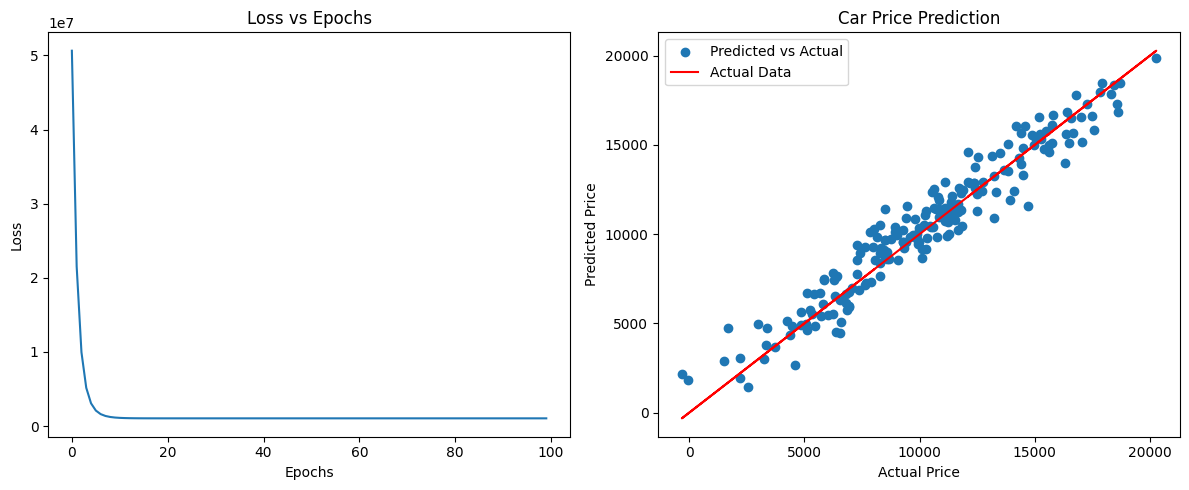

In [ ]:
#using the Three libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('car_price_data.csv')

# Preprocess the data
X = data[['Mileage', 'Age']].values # Removed 'Brand' column and it is [2D Numpy Array]
y = data['Price'].values # Removed 'Brand' column and it is [1D Numpy Array]


#Calculation
X_mean = np.mean(X, axis=0) # Calculate the mean
X_std = np.std(X, axis=0) # Calculate the standard deviation


# Normalize the features
X_scaled = (X - X_mean) / X_std #transforming the data into a common range or onto a unit sphere


#Add a column of ones to X_scaled to account for the intercept term in the linera regression model
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]# np.c concatinate arrays in columns wise

# Split the data into training and testing sets manually
def train_test_split(X, y, test_size=0.2, random_state=None):
  #If random_state is provided, set the random seed for resproducibility
  if random_state is not None:
    np.random.seed(random_state)

  #Shuffle the indices of the dataset
  shuffled_indices = np.random.permutation(len(X))\
  #Determine the size of the test set
  test_set_size = int(len(X) * test_size)
  #Split the dataset into train and test indices
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  #Return the corresponding features and labels for train and test sets
  return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Split the scaled features and target variable into train and test indices
# with 20% of the data allocated for testing, ensuring reproducibility with random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the mini-batch gradient descent function with loss tracking
def mini_batch_gradient_descent(X, y, learning_rate, batch_size, num_epochs):
    # Get the number of samples (m) and the number of features (n)
    m, n = X.shape

    # Initialize weights (w) to zeros for each feature and bias (b) to 0
    w = np.zeros(n)
    b = 0

    # Initialize a list to store the loss values for each epoch
    loss_history = []

    # Iterate over the specified number of epochs
    for epoch in range(num_epochs):
        # Iterate over the dataset in mini-batches
        for i in range(0, m, batch_size):
            # Extract the mini-batch from the dataset
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            # Initialize gradients for weights (dw) and bias (db) to zero
            dw = np.zeros(n)
            db = 0

            # Compute the gradients for each sample in the mini-batch
            for j in range(batch_size):
                # Predict the output for the j-th sample in the batch
                y_pred = np.dot(X_batch[j], w) + b

                # Calculate the error for the j-th sample
                error = y_pred - y_batch[j]

                # Accumulate the gradient for weights and bias
                dw += error * X_batch[j]
                db += error

            # Average the gradients over the batch size
            dw /= batch_size
            db /= batch_size

            # Update the weights and bias using the learning rate
            w -= learning_rate * dw
            b -= learning_rate * db

        # After each epoch, calculate the overall loss for the entire dataset
        y_pred = np.dot(X, w) + b
        loss = np.mean((y_pred - y) ** 2)

        # Record the loss in the loss history
        loss_history.append(loss)

    # Return the final weights, bias, and the history of loss values
    return w, b, loss_history


# Define the mean absolute error function
def mean_absolute_error(y_pred, y_true):
    # Calculate the mean absolute error between predicted and true values
    return np.mean(np.abs(y_pred - y_true))


# Train the model using mini-batch gradient descent
learning_rate = 0.01
batch_size = 32
num_epochs = 100
# Train the model using mini-batch gradient descent and obtain the final weights, bias, and loss history
w, b, loss_history = mini_batch_gradient_descent(X_train, y_train, learning_rate, batch_size, num_epochs)

# Make predictions on the test set using trained model
y_pred = np.dot(X_test, w) + b

# Evaluate the model using MAE and additional metrics
mae = mean_absolute_error(y_pred, y_test) # Calculate Mean Absolute Error (MAE)
mse = np.mean((y_pred - y_test) ** 2)     # Calculate Mean Square Error (MSE)
rmse = np.sqrt(mse)                       # Calculate Root Mean Square Error (RMSE)
r2 = 1 - (mse / np.var(y_test))           # Calculate R-squared (R2) value

#printing the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("R2:", r2)


# Create a figure with two subplots arrange side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss history over epochs on the first subplot (ax1)
ax1.plot(range(num_epochs), loss_history)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Loss vs Epochs")

#Create a scatter plot on the second subplot (ax2) to compare predicted and actual prices
ax2.scatter(y_test, y_pred, label='Predicted vs Actual')
ax2.plot(y_test, y_test, color='red', label='Actual Data') #ploting Actual data
ax2.set_xlabel("Actual Price")
ax2.set_ylabel("Predicted Price")
ax2.set_title("Car Price Prediction")
ax2.legend()

# Adjust the layout to prevent overlap and ensure a clean presentation
plt.tight_layout()
#Display the combine plot
plt.show()